In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import C14preproc as prep
import pylab
import copy
import C14utils
import matplotlib
import socplot_lib as socplt
import isamcalc_lib as isam
import SOCtools as soc
import matplotlib.colors as mcolors
import matplotlib.colorbar as mcolorbar


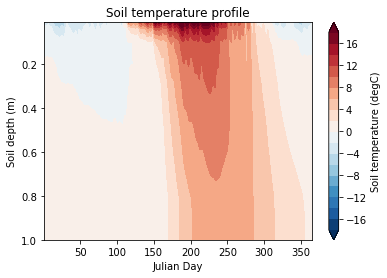

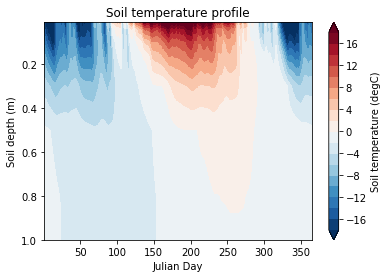

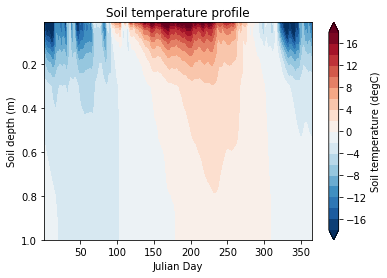

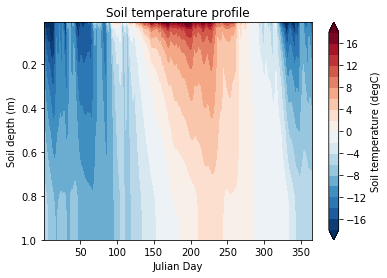

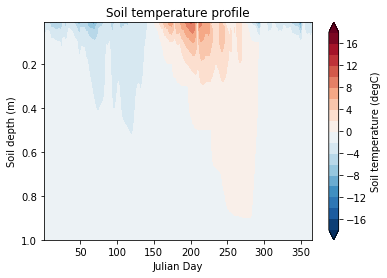

In [3]:
# Contourf plot for the environmental variables (Soil temperature and moisture)
# Two different sets of soil T and soil M are going to be plotted
# 1. Soil T and M for the model spinup
# 2. Soil T and M for the recent decade

# Soil T starts from here.

# Get soil depth of the ISAM model output
z, dz, zsoih = isam.get_isam_soildp(10)
# Retrieve the soil temperature for the recent two decades.
# Create site dict
site = {
    "43" : 0,
    "110" : 1,
    "143" : 2,
    "197" : 3,
    "146" : 4,
}

origin = 'upper'

for siteid, ind in site.items():
    fname = str(siteid)+'_soilt_pi.txt'
    soilt_test = pd.read_table(fname, header=None, delimiter=r"\s+")
    # d14cm2 = pd.read_table('isam_143_soc.dat', header=None, delimiter=r"\s+")
    soilt_test.columns = ['Layer-5', 'Layer-4', 'Layer-3', 'Layer-2', 'Layer-1', 'Layer1', 'Layer2', 'Layer3', 'Layer4', 'Layer5', 'Layer6', 'Layer7', 'Layer8', 'Layer9', 'Layer10']
    # calculate the average for every year
    temp = soilt_test.iloc[0:365].as_matrix()
    for i in np.arange(1,20):
        temp = temp + soilt_test.iloc[i*365:(i+1)*365].as_matrix()
    temp = temp / 20.
    ttt = temp[:,5:13] - 273.16005    # to degree

    # Declare an all-zero container
    container = np.asarray([[0 for col in range(14)] for row in range(365)], dtype=np.float32)

    # Do we need to interpolate? Maybe not
    # I think we have to do interpolation at this moment
    # Linear interpolation
    for i in np.arange(0,365):
        container[i,:] = np.interp([0.01, 0.02, 0.04, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], zsoih[0:8], ttt[i,:])

    # Make plot
    #y = z[0:8]
    y = [0.01, 0.02, 0.04, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    x = np.arange(1,366)
    X, Y = np.meshgrid(x, y)
    #V = np.transpose(ttt)
    V = np.transpose(container)
    nr, nc = V.shape
    
    # Set up levels
    #levels = [-20, -16, -12, -8, -4, 0, 4, 8, 12, 16, 20]
    levels = [-18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
    
    CS = plt.contourf(X, Y, V, levels,
                  #[-1, -0.1, 0, 0.1],
                  #alpha=0.5,
                  #cmap=plt.cm.bone,
                  cmap="RdBu_r",
                  origin=origin,
                  extend="both")
    
    #CS2 = plt.contour(CS, levels=CS.levels[::2],
    #              colors='k',
    #              origin=origin)

    plt.title('Soil temperature profile')
    plt.xlabel('Julian Day')
    plt.ylabel('Soil depth (m)')

    # Make a colorbar for the ContourSet returned by the contourf call.
    cbar = plt.colorbar(CS) #, orientation="horizontal")
    cbar.ax.set_ylabel('Soil temperature (degC)')
    # Add the contour line levels to the colorbar
    # cbar.add_lines(CS2)
    
    # Invert y axis
    plt.gca().invert_yaxis()

    #plt.figure()
    plt.show()
    #plt.savefig(fname+'.png', dpi = 300)
    plt.close()
    # soilt_test = soilt_test[ind].set_index('ID')
    # mod_profid = d14cm.index

In [ ]:
# Soil M starts from here

# Get soil depth of the ISAM model output
z, dz, zsoih = isam.get_isam_soildp(10)
# Retrieve the soil temperature for the recent two decades.
# Create site dict
site = {
    "43" : 0,
    "110" : 1,
    "143" : 2,
    "197" : 3,
    "146" : 4,
}

origin = 'upper'

for siteid, ind in site.items():
    fname = str(siteid)+'_soilw_pi.txt'
    soilw_test = pd.read_table(fname, header=None, delimiter=r"\s+")
    # d14cm2 = pd.read_table('isam_143_soc.dat', header=None, delimiter=r"\s+")
    soilw_test.columns = ['Layer-5', 'Layer-4', 'Layer-3', 'Layer-2', 'Layer-1', 'Layer1', 'Layer2', 'Layer3', 'Layer4', 'Layer5', 'Layer6', 'Layer7', 'Layer8', 'Layer9', 'Layer10']
    # calculate the average for every year
    temp = soilw_test.iloc[0:365].as_matrix()
    for i in np.arange(1,20):
        temp = temp + soilw_test.iloc[i*365:(i+1)*365].as_matrix()
    temp = temp / 20.
    ttt = temp[:,5:13]    # to degree

    # Declare an all-zero container
    container = np.asarray([[0 for col in range(14)] for row in range(365)], dtype=np.float32)

    # Do we need to interpolate? Maybe not
    # I think we have to do interpolation at this moment
    # Linear interpolation
    for i in np.arange(0,365):
        container[i,:] = np.interp([0.01, 0.02, 0.04, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], zsoih[0:8], ttt[i,:])

    # Make plot
    #y = z[0:8]
    y = [0.01, 0.02, 0.04, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    x = np.arange(1,366)
    X, Y = np.meshgrid(x, y)
    #V = np.transpose(ttt)
    V = np.transpose(container)
    nr, nc = V.shape
    
    # Set up levels
    #levels = [-20, -16, -12, -8, -4, 0, 4, 8, 12, 16, 20]
    levels = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
    
    CS = plt.contourf(X, Y, V, levels,
                  #[-1, -0.1, 0, 0.1],
                  #alpha=0.5,
                  #cmap=plt.cm.bone,
                  cmap="GnBu",
                  origin=origin,
                  extend="both")
    
    #CS2 = plt.contour(CS, levels=CS.levels[::2],
    #              colors='k',
    #              origin=origin)

    plt.title('Soil volumetric water content profile')
    plt.xlabel('Julian Day')
    plt.ylabel('Soil depth (m)')

    # Make a colorbar for the ContourSet returned by the contourf call.
    cbar = plt.colorbar(CS)
    cbar.ax.set_ylabel('VWC (%vol/%vol)')
    # Add the contour line levels to the colorbar
    # cbar.add_lines(CS2)
    
    # Invert y axis
    plt.gca().invert_yaxis()

    #plt.figure()
    #plt.show()
    plt.savefig(fname+'.png', dpi = 300)
    plt.close()
    # soilw_test = soilw_test[ind].set_index('ID')
    # mod_profid = d14cm.index

In [ ]:
np.shape(soilw_test.iloc[19*365:(19+1)*365].as_matrix())

In [ ]:
# Example

origin = 'lower'
#origin = 'upper'

delta = 0.025

x = y = np.arange(-3.0, 3.01, delta)
X, Y = np.meshgrid(x, y)
Z1 = plt.mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = plt.mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
Z = 10 * (Z1 - Z2)

nr, nc = Z.shape

# put NaNs in one corner:
Z[-nr//6:, -nc//6:] = np.nan
# contourf will convert these to masked


Z = np.ma.array(Z)
# mask another corner:
Z[:nr//6, :nc//6] = np.ma.masked

# mask a circle in the middle:
interior = np.sqrt((X**2) + (Y**2)) < 0.5
Z[interior] = np.ma.masked

# We are using automatic selection of contour levels;
# this is usually not such a good idea, because they don't
# occur on nice boundaries, but we do it here for purposes
# of illustration.
CS = plt.contourf(X, Y, Z, 10,
                  #[-1, -0.1, 0, 0.1],
                  #alpha=0.5,
                  cmap=plt.cm.bone,
                  origin=origin)

# Note that in the following, we explicitly pass in a subset of
# the contour levels used for the filled contours.  Alternatively,
# We could pass in additional levels to provide extra resolution,
# or leave out the levels kwarg to use all of the original levels.

CS2 = plt.contour(CS, levels=CS.levels[::2],
                  colors='r',
                  origin=origin)

plt.title('Nonsense (3 masked regions)')
plt.xlabel('word length anomaly')
plt.ylabel('sentence length anomaly')

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = plt.colorbar(CS)
cbar.ax.set_ylabel('verbosity coefficient')
# Add the contour line levels to the colorbar
cbar.add_lines(CS2)

plt.figure()

# Now make a contour plot with the levels specified,
# and with the colormap generated automatically from a list
# of colors.
levels = [-1.5, -1, -0.5, 0, 0.5, 1]
CS3 = plt.contourf(X, Y, Z, levels,
                   colors=('r', 'g', 'b'),
                   origin=origin,
                   extend='both')
# Our data range extends outside the range of levels; make
# data below the lowest contour level yellow, and above the
# highest level cyan:
CS3.cmap.set_under('yellow')
CS3.cmap.set_over('cyan')

CS4 = plt.contour(X, Y, Z, levels,
                  colors=('k',),
                  linewidths=(3,),
                  origin=origin)
plt.title('Listed colors (3 masked regions)')
plt.clabel(CS4, fmt='%2.1f', colors='w', fontsize=14)

# Notice that the colorbar command gets all the information it
# needs from the ContourSet object, CS3.
plt.colorbar(CS3)

# Illustrate all 4 possible "extend" settings:
extends = ["neither", "both", "min", "max"]
cmap = plt.cm.get_cmap("winter")
cmap.set_under("magenta")
cmap.set_over("yellow")
# Note: contouring simply excludes masked or nan regions, so
# instead of using the "bad" colormap value for them, it draws
# nothing at all in them.  Therefore the following would have
# no effect:
# cmap.set_bad("red")

fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.3)

for ax, extend in zip(axs.ravel(), extends):
    cs = ax.contourf(X, Y, Z, levels, cmap=cmap, extend=extend, origin=origin)
    fig.colorbar(cs, ax=ax, shrink=0.9)
    ax.set_title("extend = %s" % extend)
    ax.locator_params(nbins=4)

plt.show()
